In [3]:
# Import libraries
import numpy as np
import pandas as pd
import keras   # pip install keras==2.8.0
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image


In [4]:


base_path = "dataset/train_resized/images_000"


In [5]:
df = pd.read_csv("train_filtered.csv")


In [6]:
df

,id,url,landmark_id
0,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
1,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937
2,00429b0a692bc6ec,https://upload.wikimedia.org/wikipedia/commons...,183170
3,0082fd4214b3c2c7,https://upload.wikimedia.org/wikipedia/commons...,36407
4,002b386016930458,https://upload.wikimedia.org/wikipedia/commons...,119649
...,...,...,...
8259,00689736b3c596c3,https://upload.wikimedia.org/wikipedia/commons...,64810
8260,004da3f98d603ce8,https://upload.wikimedia.org/wikipedia/commons...,120148
8261,0060465becafd187,https://upload.wikimedia.org/wikipedia/commons...,62985
8262,0069f71dc6c5dac0,http://upload.wikimedia.org/wikipedia/commons/...,51272


In [7]:
# samples = 20000
df = df.loc[df["id"].str.startswith(('00', 'b1', '7d'), na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)


In [8]:
num_classes


7443

In [9]:
num_data


8264

In [10]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()


,index,landmark_id
0,138982,25
1,62798,11
2,171772,8
3,83144,8
4,45428,7


In [11]:
data.tail()


,index,landmark_id
7438,201304,1
7439,141926,1
7440,165070,1
7441,135822,1
7442,193078,1


In [12]:
data.columns = ["landmark_id", "count"]


In [13]:
data["count"].describe()


count    7443.000000
mean        1.110305
std         0.502137
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        25.000000
Name: count, dtype: float64

(array([0.000e+00, 0.000e+00, 0.000e+00, 6.818e+03, 0.000e+00, 0.000e+00,
        5.120e+02, 0.000e+00, 0.000e+00, 7.700e+01, 0.000e+00, 0.000e+00,
        2.400e+01, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

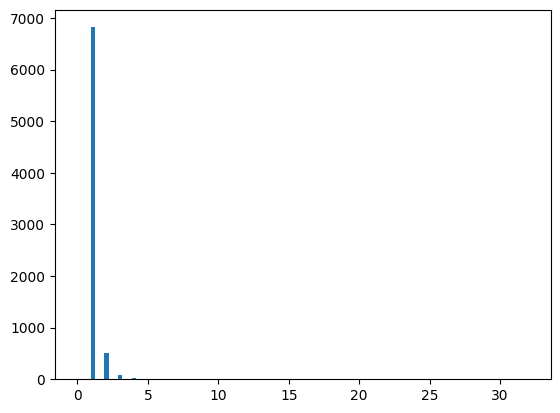

In [14]:
plt.hist(data["count"], 100, range=(0, 32), label="test")


In [15]:
data['count'].between(0, 5).sum()


7437

In [16]:
data['count'].between(5, 10).sum()


10

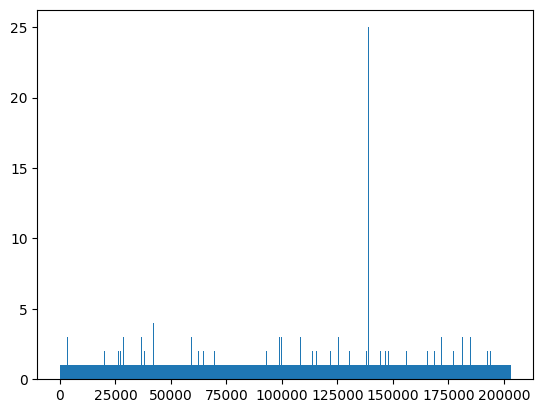

In [17]:
plt.hist(df["landmark_id"], bins=np.sort(df["landmark_id"].unique()))
plt.show()


In [18]:
# Training of Model
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])
print(lencoder)


LabelEncoder()


In [19]:
df.head()



,id,url,landmark_id
0,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
1,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937
2,00429b0a692bc6ec,https://upload.wikimedia.org/wikipedia/commons...,183170
3,0082fd4214b3c2c7,https://upload.wikimedia.org/wikipedia/commons...,36407
4,002b386016930458,https://upload.wikimedia.org/wikipedia/commons...,119649


In [20]:
def encode_label(lbl):
    return lencoder.transform(lbl)

def decode_label(lbl):
    return lencoder.inverse_transform(lbl)


In [21]:

def get_image_from_number(num, df):
    fname = df.iloc[num]["id"] + ".jpg"
    label = df.iloc[num]["landmark_id"]
    
    # Your dataset structure: first 3 chars as subfolders
    f1, f2, f3 = fname[0], fname[1], fname[2]
    path = os.path.join(base_path, f1, f2, f3, fname)
    
    if not os.path.exists(path):
        print("Missing file:", path)
        return None, None
    
    im = cv2.imread(path)
    return im, label




4 Sample images from random classes


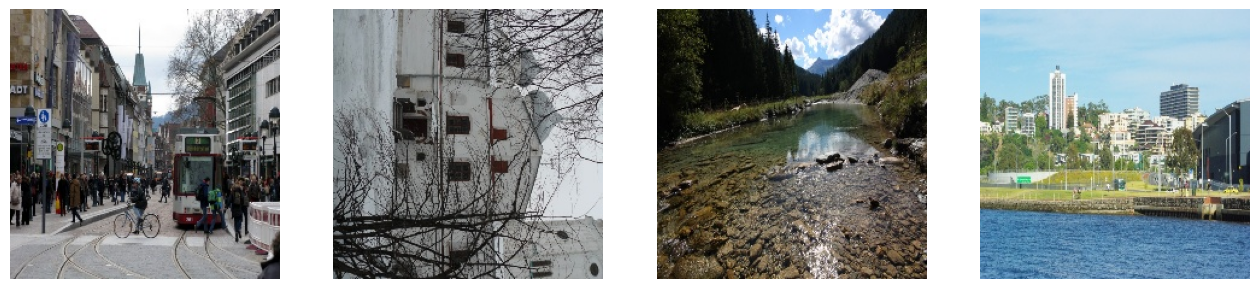

'print("4 Sample images from random classes")\nfig = plt.figure(figsize=(16,16))\n\nfor i in range(1, 5):\n    # Start at base\n    current_path = base_path\n    ri = []\n    \n    # Go 3 levels deep (only pick folders at each step)\n    for _ in range(3):\n        subfolders = [f for f in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, f))]\n        choice = random.choice(subfolders)\n        ri.append(choice)\n        current_path = os.path.join(current_path, choice)\n    \n    # Now current_path = folder with images\n    images = [f for f in os.listdir(current_path) if f.lower().endswith((\'.jpg\',\'.jpeg\',\'.png\'))]\n    random_img = random.choice(images)\n    \n    img = np.array(Image.open(os.path.join(current_path, random_img)))\n    \n    # Plot\n    fig.add_subplot(1, 4, i)\n    plt.imshow(img)\n    plt.axis("off")\n    plt.title("/".join(ri))\n\nplt.show()'

In [22]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16,16))

for i in range(1, 5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder))
    
    img = np.array(Image.open(folder + '/' + random_img))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')

plt.show()




In [23]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

# Parameters
learning_rate   = 0.0001
decay_speed     = 1e-6
momentum        = 0.90
loss_function   = "sparse_categorical_crossentropy"
source_model    = VGG19(weights=None)
drop_layer      = Dropout(0.5)
drop_layer2     = Dropout(0.5)


In [24]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [25]:
from tensorflow.keras.optimizers import RMSprop

optimi = RMSprop(learning_rate=learning_rate)

#optimi = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimi,
              loss=loss_function,
              metrics=['accuracy'])


In [26]:


def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    end_img = min(start + batch_size, len(dataframe))
    
    for idx in range(start, end_img):
        im, label = get_image_from_number(idx, dataframe)
        
        if im is None:   # Skip missing files
            continue
        
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    
    if len(image_array) == 0:  # Edge case: all files missing in this batch
        return np.empty((0, 224, 224, 3)), np.empty((0,))
    
    label_array = encode_label(label_array)
    return np.array(image_array), np.array(label_array)



In [27]:
batch_size      = 16
epoch_shuffle   = True
weight_classes  = True
epochs          = 1

# Split train and validation
train, val = np.split(df.sample(frac=1), [int(0.8*len(df))])
print(len(train))
print(len(val))


6611
1653


In [28]:
X, y = get_batch(train, 0, batch_size)
print(X.shape, y.shape)


(16, 224, 224, 3) (16,)


In [29]:

for e in range(epochs):
    print("Epoch :" + str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac=1).reset_index(drop=True)
    
    for it in range(int(np.ceil(len(train)/batch_size))):
        print(f"Epoch {e+1}, Iter {it}/{int(np.ceil(len(train)/batch_size))}")
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        print(X_train.shape, y_train.shape)  # Debug
        model.train_on_batch(X_train, y_train)



Epoch :1/1
Epoch 1, Iter 0/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 1/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 2/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 3/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 4/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 5/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 6/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 7/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 8/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 9/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 10/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 11/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 12/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 13/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 14/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 15/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 16/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 17/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 18/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 19/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 20/414
(16, 224, 224, 3) (16,)
Epoch 1, Iter 21/414
(16, 224, 224, 3) (16,)
Epoch 1, 

In [30]:
#Test
batch_size = 16
errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)
    
    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors += 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])


C:\Users\Khushi\.conda\envs\myenv\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [37]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key=lambda x: x[2], reverse=True))


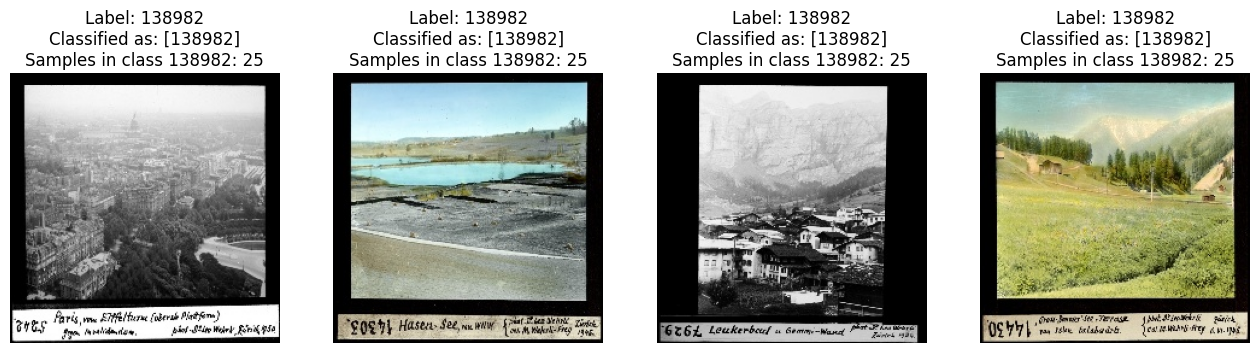

In [38]:

fig = plt.figure(figsize=(16, 16))
num_to_show = min(5, len(good_preds))   # show at most 5, or less if not enough

for i in range(num_to_show):
    n = int(good_preds[i][0])   # use list indexing
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, num_to_show, i+1)
    plt.imshow(img)
    
    lbl2 = np.array(int(good_preds[i][1])).reshape(1, 1)
    sample_cnt = list(df.landmark_id).count(lbl)
    
    plt.title(
        "Label: " + str(lbl) + 
        "\nClassified as: " + str(decode_label(lbl2)) +
        "\nSamples in class " + str(lbl) + ": " + str(sample_cnt)
    )
    plt.axis("off")

plt.show()


Top 10 most common classes:
 138982    21
62798      7
45428      7
171772     7
14559      5
152708     5
1924       5
83144      5
187779     4
187209     4
Name: landmark_id, dtype: int64


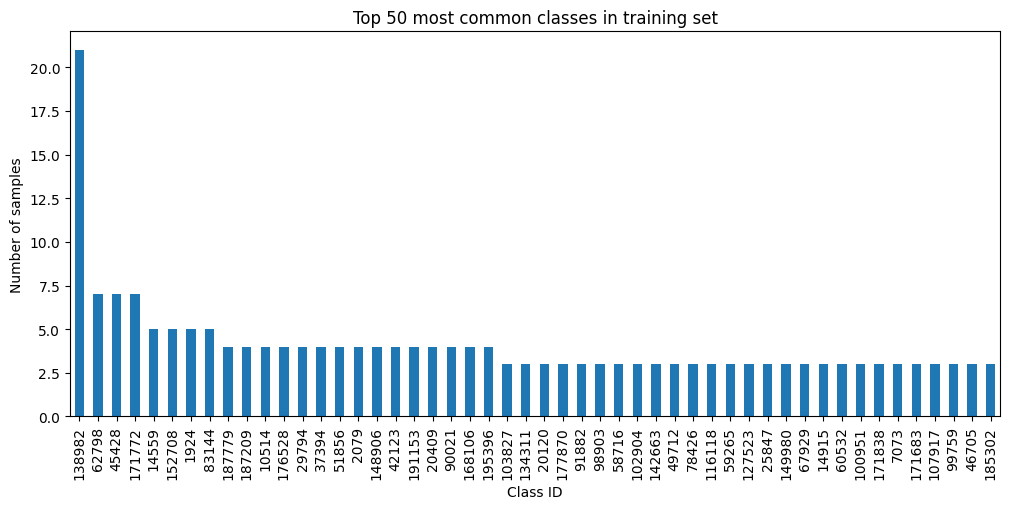

In [43]:
import matplotlib.pyplot as plt

class_counts = train['landmark_id'].value_counts()

print("Top 10 most common classes:\n", class_counts.head(10))

plt.figure(figsize=(12,5))
class_counts.head(50).plot(kind='bar')
plt.title("Top 50 most common classes in training set")
plt.xlabel("Class ID")
plt.ylabel("Number of samples")
plt.show()
